<a href="https://colab.research.google.com/github/AcuSilas/Mapping-Population-Change-Using-Folium/blob/main/Mapping_using_Folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kenya Population Change Per County from '09 to '19

In [ ]:
# Importing the libraries we need

import folium
import pandas as pd
import geopandas as gpd
import branca.colormap as cm

In [ ]:
# import json

# input_file=json.load(open("/content/Counties.json", "r", encoding="utf-8"))

# geojs={
#      "type": "FeatureCollection",
#      "features":[
#            {
#                 "type":"Feature",
#                 "geometry": {
#                 "type":"LineString",
#                 "coordinates":d["geojson"]["coordinates"],
#             },
#                 "properties":d,

#          } for d in input_file
#     ]
#  }

# output_file=open("/content/Counties.json", "w", encoding="utf-8")
# json.dump(geojs, output_file)


# output_file.close()

To create a *choropleth* we basically need 2 things:

a geoJSON file that describes our geographical features. Trough geopandas we can also directly read a shapefile in a geodataframe.

the values to be displayed (as different colours) on the map

The first step is to import a shapefile via geopandas

geopandas will create a geodataframe that will automatically generate a geoJSON when passed to folium. If you want to see the geoJSON, you can use the .to_json method

In [ ]:
#Import read and display the geojson file
county = "/content/Counties.geojson"
data = gpd.read_file(county)
data.head(6)

,FID,gid,county,pop 2009,lf_endemic,country,counts,var1_class,hiv_class,hiv_his_cl,cuid,geometry
0,0,1,Baringo,555561,No,Kenya,2,2,A,A2,vvOK1BxTbet,"POLYGON ((35.78413 1.65248, 35.78354 1.65287, ..."
1,1,29,Murang'a,942581,No,Kenya,1,2,B,B2,ahwTMNAJvrL,"MULTIPOLYGON (((37.14475 -1.05031, 37.14477 -1..."
2,2,2,Bomet,730129,No,Kenya,1,2,A,A2,HMNARUV2CW4,"POLYGON ((35.45192 -0.36477, 35.45186 -0.36468..."
3,3,3,Bungoma,1375063,No,Kenya,1,3,B,B3,KGHhQ5GLd4k,"POLYGON ((34.62083 1.09942, 34.62018 1.10016, ..."
4,4,4,Busia,743082,No,Kenya,1,2,C,C2,Tvf1zgVZ0K4,"MULTIPOLYGON (((33.91369 0.09826, 33.91369 0.1..."
5,5,5,Elgeyo-marakwet,369998,No,Kenya,2,2,A,A2,MqnLxQBigG0,"POLYGON ((35.55980 1.28418, 35.55973 1.28402, ..."


In [ ]:
# data.sort_values(by='COUNTY', ascending=True, inplace=True)

# data.head()

In [ ]:
# # Reset the index, which will add a new default "id" column
# data.reset_index(inplace=True)

# # Now you have an "id" column in your GeoDataFrame
# data.head(3)

We are not really interested in all of these data

I prefer to keep only the data we need and therefore index and geometry. We will use other data from another source

In [ ]:
data = data.rename(columns={'gid': 'index'})

data.head()

,FID,index,county,pop 2009,lf_endemic,country,counts,var1_class,hiv_class,hiv_his_cl,cuid,geometry
0,0,1,Baringo,555561,No,Kenya,2,2,A,A2,vvOK1BxTbet,"POLYGON ((35.78413 1.65248, 35.78354 1.65287, ..."
1,1,29,Murang'a,942581,No,Kenya,1,2,B,B2,ahwTMNAJvrL,"MULTIPOLYGON (((37.14475 -1.05031, 37.14477 -1..."
2,2,2,Bomet,730129,No,Kenya,1,2,A,A2,HMNARUV2CW4,"POLYGON ((35.45192 -0.36477, 35.45186 -0.36468..."
3,3,3,Bungoma,1375063,No,Kenya,1,3,B,B3,KGHhQ5GLd4k,"POLYGON ((34.62083 1.09942, 34.62018 1.10016, ..."
4,4,4,Busia,743082,No,Kenya,1,2,C,C2,Tvf1zgVZ0K4,"MULTIPOLYGON (((33.91369 0.09826, 33.91369 0.1..."


In [ ]:
data_new = data[['index','geometry']]
data_new.head(12)

,index,geometry
0,1,"POLYGON ((35.78413 1.65248, 35.78354 1.65287, ..."
1,29,"MULTIPOLYGON (((37.14475 -1.05031, 37.14477 -1..."
2,2,"POLYGON ((35.45192 -0.36477, 35.45186 -0.36468..."
3,3,"POLYGON ((34.62083 1.09942, 34.62018 1.10016, ..."
4,4,"MULTIPOLYGON (((33.91369 0.09826, 33.91369 0.1..."
5,5,"POLYGON ((35.55980 1.28418, 35.55973 1.28402, ..."
6,6,"POLYGON ((37.55331 -0.36296, 37.55231 -0.36207..."
7,7,"POLYGON ((39.56107 0.75546, 39.56103 0.75676, ..."
8,8,"MULTIPOLYGON (((34.17633 -0.77057, 34.17597 -0..."
9,9,"POLYGON ((39.09465 1.89615, 39.09308 1.89717, ..."


In [ ]:
data_new.sort_values(by='index', ascending=True, inplace=True)

data_new.head()

<ipython-input-7-7cd962909fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.sort_values(by='index', ascending=True, inplace=True)


,index,geometry
0,1,"POLYGON ((35.78413 1.65248, 35.78354 1.65287, ..."
2,2,"POLYGON ((35.45192 -0.36477, 35.45186 -0.36468..."
3,3,"POLYGON ((34.62083 1.09942, 34.62018 1.10016, ..."
4,4,"MULTIPOLYGON (((33.91369 0.09826, 33.91369 0.1..."
5,5,"POLYGON ((35.55980 1.28418, 35.55973 1.28402, ..."


Now we load the data file that contains information about the resident population for each county

We will use this data to create a choropleth with the population change from the two census reports. We can engage in a bit of EDA to see how the values relate.

In [ ]:
population = pd.read_csv('/content/2019-population_census-report-per-county.csv')
population.head(3)

,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019,index
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13,1
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23,2
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35,3


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    47 non-null     object
 1   Total_Population19        47 non-null     object
 2   Male populatio 2019       47 non-null     object
 3   Female population 2019    47 non-null     object
 4   Households                47 non-null     object
 5   Av_HH_Size                47 non-null     int64 
 6   LandArea                  47 non-null     object
 7   Population Density        47 non-null     object
 8   Population in 2009        47 non-null     object
 9   Pop_change                47 non-null     object
 10  Intersex population 2019  47 non-null     int64 
 11  index                     47 non-null     int64 
dtypes: int64(3), object(9)
memory usage: 4.5+ KB


In [ ]:
# population['County'] = population['County'].sort_values()

# population.head()

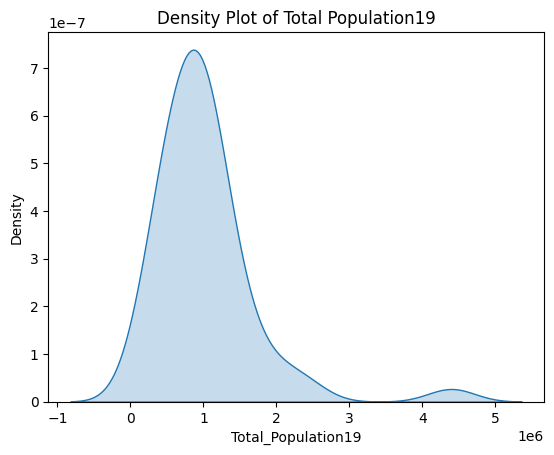

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove commas and spaces from 'Total_Population19' column and convert to float
population['Total_Population19'] = population['Total_Population19'].str.replace(',', '').str.strip().astype(float)

# Plot the density plot
sns.kdeplot(population['Total_Population19'], fill=True)
plt.title('Density Plot of Total Population19')
plt.show()

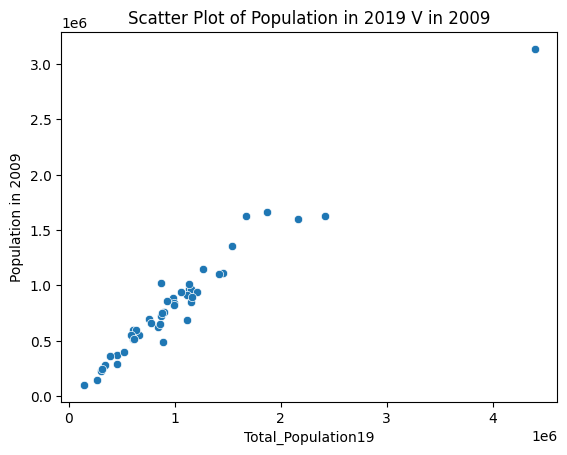

In [ ]:
# Remove commas and spaces from 'Population in 2009' column and convert to float
population['Population in 2009'] = population['Population in 2009'].str.replace(',', '').str.strip().astype(float)

sns.scatterplot(x='Total_Population19', y='Population in 2009', data=population)
plt.title('Scatter Plot of Population in 2019 V in 2009')
plt.show()

In [ ]:
# I need population change data as either integer or float
population['Pop_change'] = population['Pop_change'].str.replace(',', '')  # Remove commas
population['Pop_change'] = population['Pop_change'].str.replace('(', '-')  # Replace '(' with '-' for negative values
population['Pop_change'] = population['Pop_change'].str.replace(')', '')  # Remove closing parenthesis
population['Pop_change'] = population['Pop_change'].astype(float)  # Convert to float

# Now, 'Pop_change' should contain float values


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   County                    47 non-null     object 
 1   Total_Population19        47 non-null     float64
 2   Male populatio 2019       47 non-null     object 
 3   Female population 2019    47 non-null     object 
 4   Households                47 non-null     object 
 5   Av_HH_Size                47 non-null     int64  
 6   LandArea                  47 non-null     object 
 7   Population Density        47 non-null     object 
 8   Population in 2009        47 non-null     float64
 9   Pop_change                47 non-null     float64
 10  Intersex population 2019  47 non-null     int64  
 11  index                     47 non-null     int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 4.5+ KB


In [ ]:
# #Reset the index, which will add a new default "id" column
# population.reset_index(inplace=True)

# #Now you have an "id" column in your GeoDataFrame
# population.head(3)

In [ ]:
# Just need County and Pop_change now
pop_new = population[['index','County','Pop_change']]
pop_new.head(5)

,index,County,Pop_change
0,1,Baringo,111202.0
1,2,Bomet,151503.0
2,3,Bungoma,39636.0
3,4,Busia,405606.0
4,5,Elgeyo-Marakwet,84482.0


Now we will merge this data with the geodataframe, so that we can directly access the data

Folium allows also to read data from another file, but in this way we can overcome a limit of the choropleth method that doesn't allow to use tooltips on single features (we will see this later)

In [ ]:
new_data = data_new.merge(pop_new,on="index")
new_data.head()

,index,geometry,County,Pop_change
0,1,"POLYGON ((35.78413 1.65248, 35.78354 1.65287, ...",Baringo,111202.0
1,2,"POLYGON ((35.45192 -0.36477, 35.45186 -0.36468...",Bomet,151503.0
2,3,"POLYGON ((34.62083 1.09942, 34.62018 1.10016, ...",Bungoma,39636.0
3,4,"MULTIPOLYGON (((33.91369 0.09826, 33.91369 0.1...",Busia,405606.0
4,5,"POLYGON ((35.55980 1.28418, 35.55973 1.28402, ...",Elgeyo-Marakwet,84482.0


In [ ]:
new_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       47 non-null     int64   
 1   geometry    47 non-null     geometry
 2   County      47 non-null     object  
 3   Pop_change  47 non-null     float64 
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# # I need population change data as either integer or float
# new_data['Pop_change'] = new_data['Pop_change'].str.replace(',', '')  # Remove commas
# new_data['Pop_change'] = new_data['Pop_change'].str.replace('(', '-')  # Replace '(' with '-' for negative values
# new_data['Pop_change'] = new_data['Pop_change'].str.replace(')', '')  # Remove closing parenthesis
# new_data['Pop_change'] = new_data['Pop_change'].astype(float)  # Convert to float

# # Now, 'Pop_change' should contain float values

Now we have all the data we need to create the choropleth map

So, let's start creating the map

TIP 1: Centering the map automatically (based on our features)

To create a Folium map we need to tell at which coordinates the map is centred at the start

Instead of guessing or give a rough value, we can just take the mean of the centre of all our features

This way we will have the coordinates we are looking for

In [ ]:
x_map = data_new.centroid.x.mean()
y_map = data_new.centroid.y.mean()
print(x_map,y_map)

36.79424695242985 -0.33854003426916424


<ipython-input-20-acf472c9ac85>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_map = data_new.centroid.x.mean()
<ipython-input-20-acf472c9ac85>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_map = data_new.centroid.y.mean()


Now we can initialize the map. With Folium we can use different map tiles (OpenStreetMap, CartoDB, Stamen, Mapbox...) and also choose more than one.

TIP 2: Hide tile set from LayerControl

If we specify a tile set directly in folium.Map call, we cannot later hide it from the LayerControl

If we do not specify a tile, it will default on OpenStreetMap

But if 1) we do not specify a tile in the Map constructor, and then 2) add a tile via the TileLayer method, then we can specify the control=False option

In [ ]:
mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

Now we can use Folium choropleth method to draw our choropleth map

We need to pass:

geo_data: the geopandas dataframe with the geometries
data: the dataframe containing values we want to show in the map (in this case it will be the same as geo_data)
columns the columns inside the data dataframe that contains the keys and the values to be mapped
TIP 3: Using values inside the GeoJSON

Instead of using a separate dataframe for our values, we can also use a value already inside our geo_data dataframe

The tricky part is the key_on parameter

It should start with ‘feature’ and be in JavaScript objection notation, so in our case, it is feature.properties.ID_NIL

fill_color can be a ColorBrewer palette (http://colorbrewer2.org)
threshold_scale can be passed to give a different threshold scale.
TIP 4: Using a custom threshold scale

If you don't want to use the default D3 scale (Folium uses Leaflet that uses D3), you can easily pass your own scale via threshold_scale parameter

Instead of using fixed values depending on the data we have, you can use quantile() and tolist() to specify a quantile scale. Or (and we will see this later) you can use a custom colormap

In [ ]:
myscale = (new_data['Pop_change'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()

m = folium.Map([43, -100], zoom_start=4)

mymap.choropleth(
 geo_data = new_data,
 name = 'Choropleth',
 data = new_data,
 columns = ['index','Pop_change'],
 key_on = "feature.properties.index",
 fill_color = 'YlGnBu',
 threshold_scale = myscale,
 fill_opacity = 1,
 line_opacity = 0.2,
 legend_name = "Population Change from '09 to '19",
 smooth_factor = 0
)
mymap

Now we have a nice choropleth map but it's completely static. How can we add some interactivity?

The choropleth method in Folium doesn't allow us to interact with the different polygons so we need to find another way

And here's come the trick

TIP 5: Overlay the geographical features again this time using folium.features.GeoJson method

We can use the same geodataframe to draw the features using a different method

This way we can add some interactivity to the map

And most important, we can add a tooltip that can also show for each feature the associated data inside the geoJSON

We will use three useful parameters for this method:

highlight_function: allows to specify a function mapping a GeoJson Feature to a style dict for mouse events
style_function: allows to specify a function mapping a GeoJson Feature to a style dict
tooltip: allows to display a text when hovering over the object
As a tooltip, we will use the folium.features.GeoJsonTooltip method that allows to access data inside the GeoJson. In this way, and for each feature, we can get the neighborhood name and resident foreign population value.

TIP 6: Use the keep_in_front parameter when you have multiple map layers

We want the NIL group to be always in front as this layer gives us the interactivity

If you don't specify that parameter, when you hide the choropleth and then you show it again, it will lay over the NIL group and we lost the highlight feature and tooltips

In [ ]:
style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    new_data,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['County','Pop_change'],
        aliases=['County: ','Population change in census: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap

In [ ]:
mymap.save("PopChange.html")

In [ ]:
# Convert the Folium map to HTML
mymap1 = mymap._repr_html_()

# Write the HTML content to a file
with open('map.html', 'w') as file:
    file.write(mymap1)